Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Crop Project/Datasets/Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
data.isnull()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [5]:
data.isna()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [6]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [7]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [8]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [9]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [10]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [11]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [12]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]


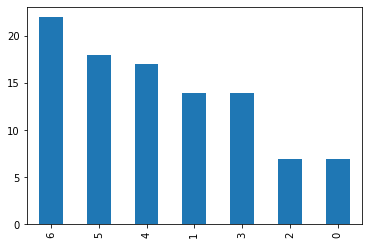

In [13]:
labels = data["Fertilizer Name"].unique()
data["Fertilizer Name"].value_counts().plot(kind="bar")
plt.show()

In [14]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.4, random_state = 42)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (59, 8), (59,)
Test Data: (40, 8), (40,)


In [15]:
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()    
Xtrain= sc.fit_transform(X_train)    
Xtest= sc.transform(X_test)  

In [16]:
acc=[]
model=[]

In [17]:
xgb =  XGBClassifier(random_state = 18)
xgb.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc.append(accuracy)
model.append('XGBoost')
print(f"Accuracy on Test Data: {accuracy*100}%")

Accuracy on Test Data: 92.5%


In [18]:
rf = RandomForestClassifier(random_state = 12)
rf.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc.append(accuracy)
model.append('Random Forest')
print(f"Accuracy on Test Data: {accuracy*100}%")

Accuracy on Test Data: 100.0%


In [19]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
# Accuray On Test Data
predictions = svc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc.append(accuracy)
model.append('SVC')
print(f"Accuracy on Test Data: {accuracy*100}%")

Accuracy on Test Data: 75.0%


In [20]:
from xgboost.sklearn import XGBRFClassifier
pickle.dump(svc, open("svc.pkl", "wb"))
pickle.dump(rf, open("rf.pkl", "wb"))
pickle.dump(XGBRFClassifier, open("xgb.pkl", "wb"))
pickle.dump(fertname_dict, open("fertname_dict.pkl", "wb"))
pickle.dump(croptype_dict, open("croptype_dict.pkl", "wb"))
pickle.dump(soiltype_dict, open("soiltype_dict.pkl", "wb"))
print("Saved All Models")

Saved All Models


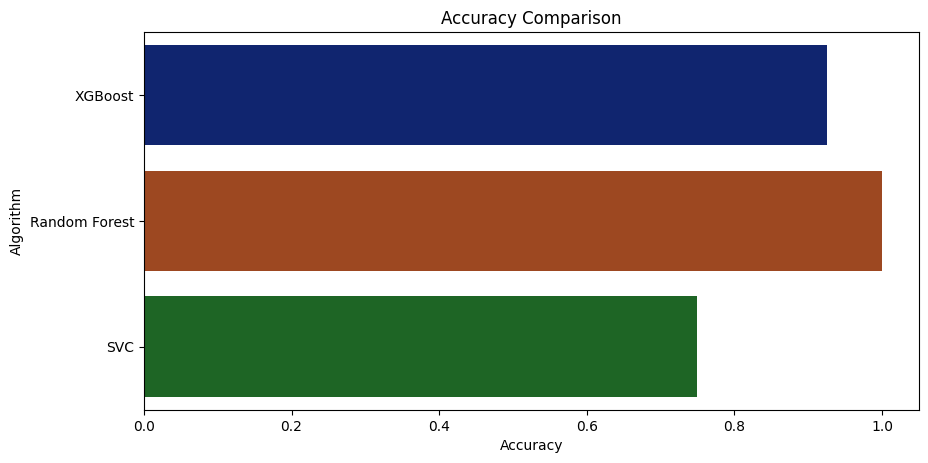

In [21]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')